# Japan Outbound Tourism Analysis
## Introduction
This project analyzes outbound travel from Japan using data provided by Japan Tourism Marketing Co. 
The goal of this project is to gain a comprehensive understanding of Japanese outbound travel patterns to inform insights and decision-making in tourism marketing.

## Questions to Answer
1. Which countries are gaining or losing popularity among Japanese travelers, and which are the top 5 destinations?
2. Which destinations are most popular among Japanese travelers in the given period, and how has their popularity changed compared to last year?
3. Which months show peaks in outbound travel, and linking these patterns to Japanese holidays (e.g., Golden Week, Obon, New Year).
4. How does outbound travel from Japan compare across Asia, Europe, and North America, and which region is experiencing the fastest growth?

## Import Libraries and Data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

#load data
outbound_data = pd.read_excel("JTM_outbound20250805eng.xlsx", header=1)

#remove unnecessary columns
outbound_data = outbound_data.loc[:, ~outbound_data.columns.str.contains("Unnamed")]

## Explore Data

In [31]:
outbound_data

,*NF:Frontier arrivals reported by Nationality,*RF:Frontier arrivals reported by Residence,(depart from Japan),Korea,China,Taiwan,Hong Kong,Macao,Thailand,Malaysia,...,Austria,Netherland,Belgium,Czech,Turkey,Hungary,Croatia,Slovenia,Italy,UK
0,*HA:Arrivals in Hotels,*HN:Nights spent in Hotels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a:approximate / p:preliminary / e:estimate,NaN,Number,Number,Number,Number,Number,Number,Number,Number,...,Number,Number,Number,Number,Number,Number,NaN,NaN,Number,Number
2,2000,Jan,1228599,155106,136178,56008,104119,11543,93643,45544,...,7792,8300,NaN,1394,NaN,NaN,NaN,NaN,NaN,1-3月
3,NaN,Feb,1414251,196085,157092,61878,103304,11713,109967,38234,...,10019,9900,NaN,2240,NaN,NaN,NaN,NaN,NaN,119000
4,NaN,Mar,1573517,221620,188109,78422,127764,12574,115317,50594,...,16238,13200,NaN,3461,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean Data

In [32]:
#reset index, drop first 2 rows
outbound_data = outbound_data.reset_index(drop=True)
outbound_data = outbound_data.drop([0,1])
outbound_data

,*NF:Frontier arrivals reported by Nationality,*RF:Frontier arrivals reported by Residence,(depart from Japan),Korea,China,Taiwan,Hong Kong,Macao,Thailand,Malaysia,...,Austria,Netherland,Belgium,Czech,Turkey,Hungary,Croatia,Slovenia,Italy,UK
2,2000,Jan,1228599,155106,136178,56008,104119,11543,93643,45544,...,7792,8300,NaN,1394,NaN,NaN,NaN,NaN,NaN,1-3月
3,NaN,Feb,1414251,196085,157092,61878,103304,11713,109967,38234,...,10019,9900,NaN,2240,NaN,NaN,NaN,NaN,NaN,119000
4,NaN,Mar,1573517,221620,188109,78422,127764,12574,115317,50594,...,16238,13200,NaN,3461,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Apr,1305417,180118,158705,64682,94447,9369,87463,42763,...,16930,28300,NaN,4061,NaN,NaN,NaN,NaN,NaN,4-6月
6,NaN,May,1369655,204943,190255,72099,107565,12630,78034,50491,...,27671,22900,NaN,9062,NaN,NaN,NaN,NaN,NaN,129000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#reset index again
outbound_data = outbound_data.reset_index(drop=True)
outbound_data

,*NF:Frontier arrivals reported by Nationality,*RF:Frontier arrivals reported by Residence,(depart from Japan),Korea,China,Taiwan,Hong Kong,Macao,Thailand,Malaysia,...,Austria,Netherland,Belgium,Czech,Turkey,Hungary,Croatia,Slovenia,Italy,UK
0,2000,Jan,1228599,155106,136178,56008,104119,11543,93643,45544,...,7792,8300,NaN,1394,NaN,NaN,NaN,NaN,NaN,1-3月
1,NaN,Feb,1414251,196085,157092,61878,103304,11713,109967,38234,...,10019,9900,NaN,2240,NaN,NaN,NaN,NaN,NaN,119000
2,NaN,Mar,1573517,221620,188109,78422,127764,12574,115317,50594,...,16238,13200,NaN,3461,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Apr,1305417,180118,158705,64682,94447,9369,87463,42763,...,16930,28300,NaN,4061,NaN,NaN,NaN,NaN,NaN,4-6月
4,NaN,May,1369655,204943,190255,72099,107565,12630,78034,50491,...,27671,22900,NaN,9062,NaN,NaN,NaN,NaN,NaN,129000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#rename columns with appropriate names
outbound_data.rename(columns={'*NF:Frontier arrivals reported by Nationality': 'Year'}, inplace=True)
outbound_data.rename(columns={'*RF:Frontier arrivals reported by Residence': 'Month'}, inplace=True)
outbound_data.rename(columns={'(depart from Japan)': 'Total Visitors'}, inplace=True)
outbound_data

,Year,Month,Total Visitors,Korea,China,Taiwan,Hong Kong,Macao,Thailand,Malaysia,...,Austria,Netherland,Belgium,Czech,Turkey,Hungary,Croatia,Slovenia,Italy,UK
0,2000,Jan,1228599,155106,136178,56008,104119,11543,93643,45544,...,7792,8300,NaN,1394,NaN,NaN,NaN,NaN,NaN,1-3月
1,NaN,Feb,1414251,196085,157092,61878,103304,11713,109967,38234,...,10019,9900,NaN,2240,NaN,NaN,NaN,NaN,NaN,119000
2,NaN,Mar,1573517,221620,188109,78422,127764,12574,115317,50594,...,16238,13200,NaN,3461,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Apr,1305417,180118,158705,64682,94447,9369,87463,42763,...,16930,28300,NaN,4061,NaN,NaN,NaN,NaN,NaN,4-6月
4,NaN,May,1369655,204943,190255,72099,107565,12630,78034,50491,...,27671,22900,NaN,9062,NaN,NaN,NaN,NaN,NaN,129000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#fill in blank cells in year column
outbound_data['Year'] = outbound_data['Year'].ffill()
outbound_data

,Year,Month,Total Visitors,Korea,China,Taiwan,Hong Kong,Macao,Thailand,Malaysia,...,Austria,Netherland,Belgium,Czech,Turkey,Hungary,Croatia,Slovenia,Italy,UK
0,2000,Jan,1228599,155106,136178,56008,104119,11543,93643,45544,...,7792,8300,NaN,1394,NaN,NaN,NaN,NaN,NaN,1-3月
1,2000,Feb,1414251,196085,157092,61878,103304,11713,109967,38234,...,10019,9900,NaN,2240,NaN,NaN,NaN,NaN,NaN,119000
2,2000,Mar,1573517,221620,188109,78422,127764,12574,115317,50594,...,16238,13200,NaN,3461,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Apr,1305417,180118,158705,64682,94447,9369,87463,42763,...,16930,28300,NaN,4061,NaN,NaN,NaN,NaN,NaN,4-6月
4,2000,May,1369655,204943,190255,72099,107565,12630,78034,50491,...,27671,22900,NaN,9062,NaN,NaN,NaN,NaN,NaN,129000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,Slovenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#remove rows which are not part of of the data
outbound_data = outbound_data[outbound_data["Year"].apply(lambda x: isinstance(x, int))]
outbound_data = outbound_data[~outbound_data["Month"].str.contains("TOTAL", case=False, na=False)]
outbound_data = outbound_data.dropna(subset=["Month"])
outbound_data

,Year,Month,Total Visitors,Korea,China,Taiwan,Hong Kong,Macao,Thailand,Malaysia,...,Austria,Netherland,Belgium,Czech,Turkey,Hungary,Croatia,Slovenia,Italy,UK
0,2000,Jan,1228599,155106,136178,56008,104119,11543,93643,45544,...,7792,8300,NaN,1394,NaN,NaN,NaN,NaN,NaN,1-3月
1,2000,Feb,1414251,196085,157092,61878,103304,11713,109967,38234,...,10019,9900,NaN,2240,NaN,NaN,NaN,NaN,NaN,119000
2,2000,Mar,1573517,221620,188109,78422,127764,12574,115317,50594,...,16238,13200,NaN,3461,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Apr,1305417,180118,158705,64682,94447,9369,87463,42763,...,16930,28300,NaN,4061,NaN,NaN,NaN,NaN,NaN,4-6月
4,2000,May,1369655,204943,190255,72099,107565,12630,78034,50491,...,27671,22900,NaN,9062,NaN,NaN,NaN,NaN,NaN,129000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2025,Aug,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,2025,Sep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,2025,Oct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,2025,Nov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#fill blank cells in UK column (data is given once every 3 months)
outbound_data["UK"] = outbound_data["UK"].apply(lambda x: x if isinstance(x, int) else 0)
outbound_data["UK"] = outbound_data["UK"].shift(-1)
outbound_data['UK'] = outbound_data['UK'].replace(0, np.nan).ffill()
outbound_data["UK"] = (outbound_data["UK"] / 3).astype(int)
outbound_data

,Year,Month,Total Visitors,Korea,China,Taiwan,Hong Kong,Macao,Thailand,Malaysia,...,Austria,Netherland,Belgium,Czech,Turkey,Hungary,Croatia,Slovenia,Italy,UK
0,2000,Jan,1228599,155106,136178,56008,104119,11543,93643,45544,...,7792,8300,NaN,1394,NaN,NaN,NaN,NaN,NaN,39666
1,2000,Feb,1414251,196085,157092,61878,103304,11713,109967,38234,...,10019,9900,NaN,2240,NaN,NaN,NaN,NaN,NaN,39666
2,2000,Mar,1573517,221620,188109,78422,127764,12574,115317,50594,...,16238,13200,NaN,3461,NaN,NaN,NaN,NaN,NaN,39666
3,2000,Apr,1305417,180118,158705,64682,94447,9369,87463,42763,...,16930,28300,NaN,4061,NaN,NaN,NaN,NaN,NaN,43000
4,2000,May,1369655,204943,190255,72099,107565,12630,78034,50491,...,27671,22900,NaN,9062,NaN,NaN,NaN,NaN,NaN,43000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2025,Aug,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29178
308,2025,Sep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29178
309,2025,Oct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29178
310,2025,Nov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29178


In [38]:
#fill blank cells in Vietnam column (data is given once every 12 months)
outbound_data["Vietnam *RF"] = outbound_data["Vietnam *RF"].apply(lambda x: x if isinstance(x, int) else 0)
outbound_data['Vietnam *RF'] = outbound_data['Vietnam *RF'].shift(-11)
outbound_data['Vietnam *RF'] = outbound_data['Vietnam *RF'].replace(0, np.nan).ffill()
outbound_data["Vietnam *RF"] = (outbound_data["Vietnam *RF"] / 12).astype(int)
outbound_data.rename(columns={'Vietnam *RF': 'Vietnam'}, inplace=True)

In [39]:
#remove unused columns, replace non-digit with 0
outbound_data = outbound_data.drop(columns='Total Visitors')
pd.set_option("future.no_silent_downcasting", True)
outbound_data = outbound_data.fillna(0)
outbound_data = outbound_data.replace(r'^\s*$', 0, regex=True)
cols_to_drop = [
    col for col in outbound_data.columns 
    if col != 'Month' and outbound_data[col].astype(str).str.contains(r'\D', case=False).any()
]
outbound_data = outbound_data.drop(columns=cols_to_drop)
outbound_data

,Year,Month,Korea,China,Taiwan,Hong Kong,Macao,Thailand,Malaysia,Singapore,...,U.S.A,Guam,N. Mariana,New Zealand,Austria,Belgium,Turkey,Hungary,Italy,UK
0,2000,Jan,155106,136178,56008,104119,11543,93643,45544,72128,...,354266,80211,32628,13362,7792,0,0,0,0,39666
1,2000,Feb,196085,157092,61878,103304,11713,109967,38234,71196,...,411855,92884,35135,16425,10019,0,0,0,0,39666
2,2000,Mar,221620,188109,78422,127764,12574,115317,50594,91843,...,453060,99614,34188,13635,16238,0,0,0,0,39666
3,2000,Apr,180118,158705,64682,94447,9369,87463,42763,60520,...,367822,80431,27848,10800,16930,0,0,0,0,43000
4,2000,May,204943,190255,72099,107565,12630,78034,50491,62139,...,397653,81813,29267,8789,27671,0,0,0,0,43000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2025,Aug,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29178
308,2025,Sep,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29178
309,2025,Oct,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29178
310,2025,Nov,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29178


## Analyse Data
### Q1. Which countries are gaining or losing popularity among Japanese travelers, and which are the top 5 destinations?

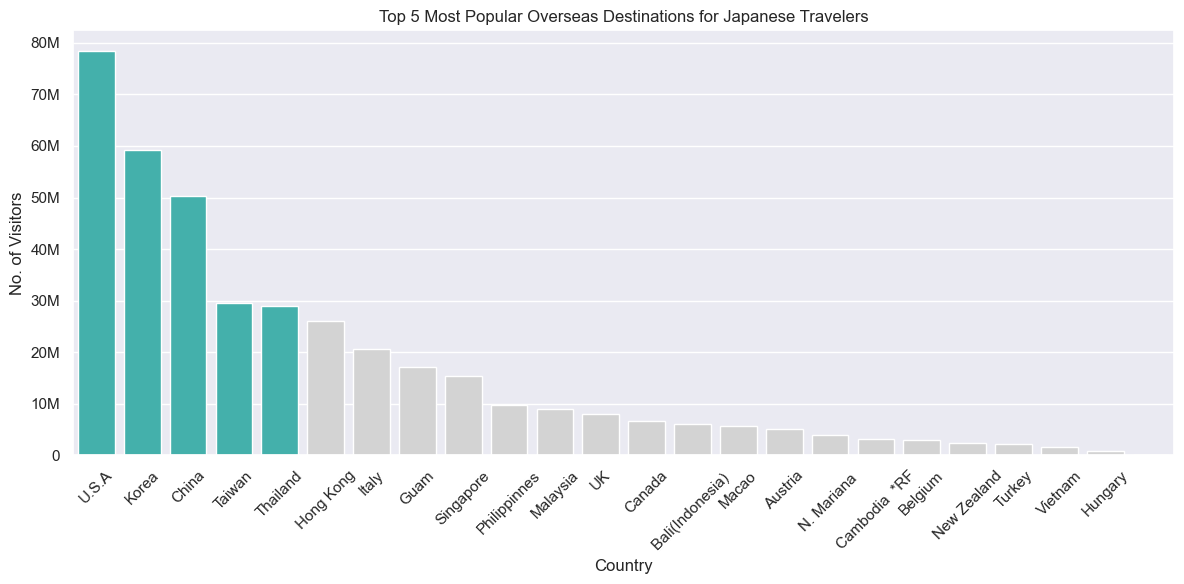

In [44]:
#data prep
visitor_columns = outbound_data.drop(columns=['Year','Month'])
total_visitors_per_country = visitor_columns.sum().sort_values(ascending=False).reset_index()
total_visitors_per_country.columns = ['Country', 'Visitors']

#create barplot
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=total_visitors_per_country,
    x='Country',
    y='Visitors',
    color='lightgrey'  # default color
)

for i, patch in enumerate(ax.patches):
    if i < 5:
        patch.set_facecolor('#44B0AB')

#custom y-axis formatter for readibility
def format_number(x, pos):
    if x >= 1_000_000:
        return f"{int(x/1_000_000)}M"
    elif x >= 1_000:
        return f"{int(x/1_000)}K"
    else:
        return str(int(x))

ax.yaxis.set_major_formatter(FuncFormatter(format_number))

plt.title('Top 5 Most Popular Overseas Destinations for Japanese Travelers')
plt.ylabel('No. of Visitors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q2. Which destinations are most popular among Japanese travelers in the given period, and how has their popularity changed compared to last year?

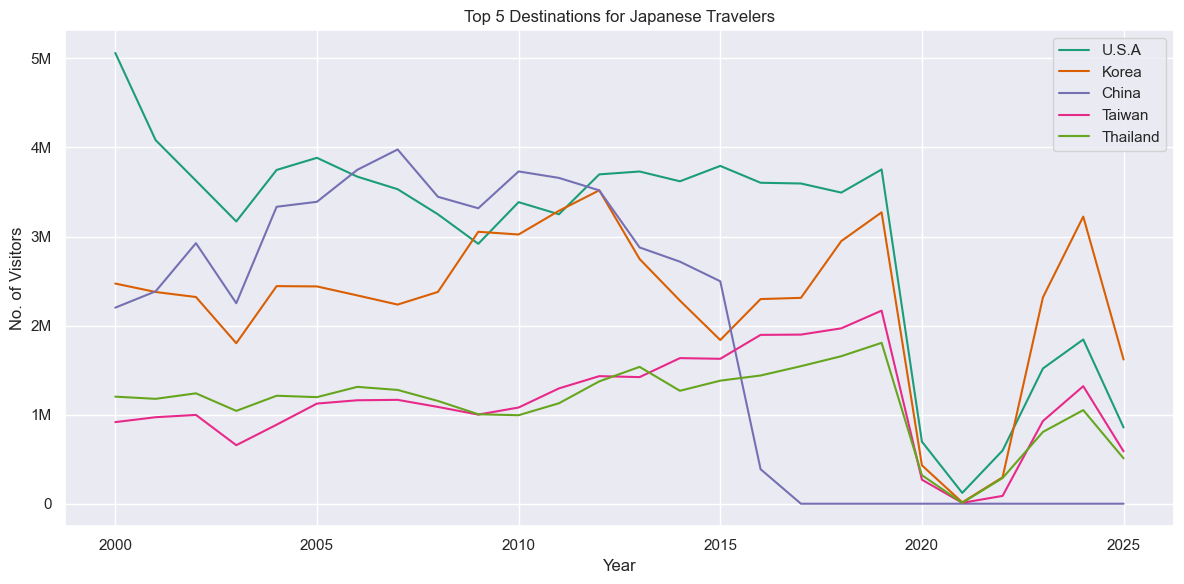

In [41]:
#data prep
df_grouped = outbound_data.groupby("Year").sum()
df_numeric = outbound_data.apply(pd.to_numeric, errors='coerce')
top5_countries = df_numeric.sum().sort_values(ascending=False).head(5).index.tolist()

#create plot
df_grouped[top5_countries].plot(figsize=(12,6))
sns.set_theme(palette="Dark2")

#custom y-axis formatter for readibility
def format_number(x, pos):
    if x >= 1_000_000:
        return f"{int(x/1_000_000)}M"
    elif x >= 1_000:
        return f"{int(x/1_000)}K"
    else:
        return str(int(x))

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))

plt.title("Top 5 Destinations for Japanese Travelers")
plt.ylabel("No. of Visitors")
plt.tight_layout()
plt.show()

#### Q3. Which months show peaks in outbound travel, and linking these patterns to Japanese holidays?

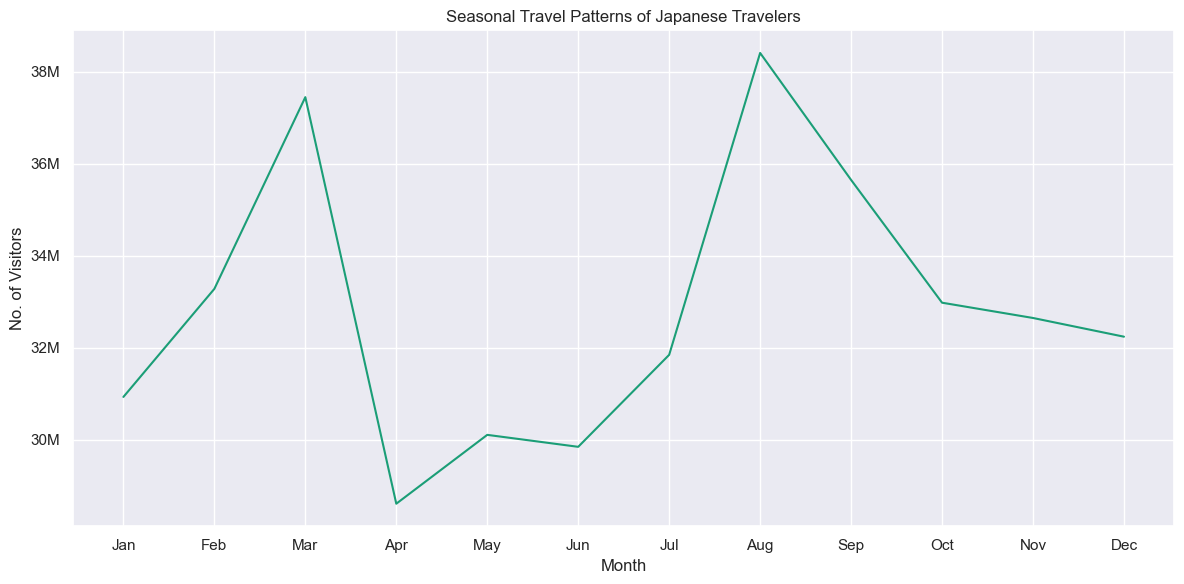

In [51]:
#data prep
months_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
outbound_data['Month'] = pd.Categorical(outbound_data['Month'], categories=months_order, ordered=True)
numeric_cols = outbound_data.select_dtypes(include='number').columns
outbound_data_month_grouped = outbound_data.groupby('Month', observed=False)[numeric_cols].sum().reindex(months_order)
outbound_data_month_grouped['Total'] = outbound_data_month_grouped.sum(axis=1)
df_plot = outbound_data_month_grouped.reset_index()

#create plot
sns.set_theme(palette="Dark2")
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=df_plot, x='Month', y='Total')

# Custom y-axis formatter for readability
ax.yaxis.set_major_formatter(FuncFormatter(format_number))

plt.title("Seasonal Travel Patterns of Japanese Travelers")
plt.ylabel("No. of Visitors")
plt.tight_layout()
plt.show()


#### Q4. How does outbound travel from Japan compare across Asia, Europe, and North America, and which region is experiencing the fastest growth?

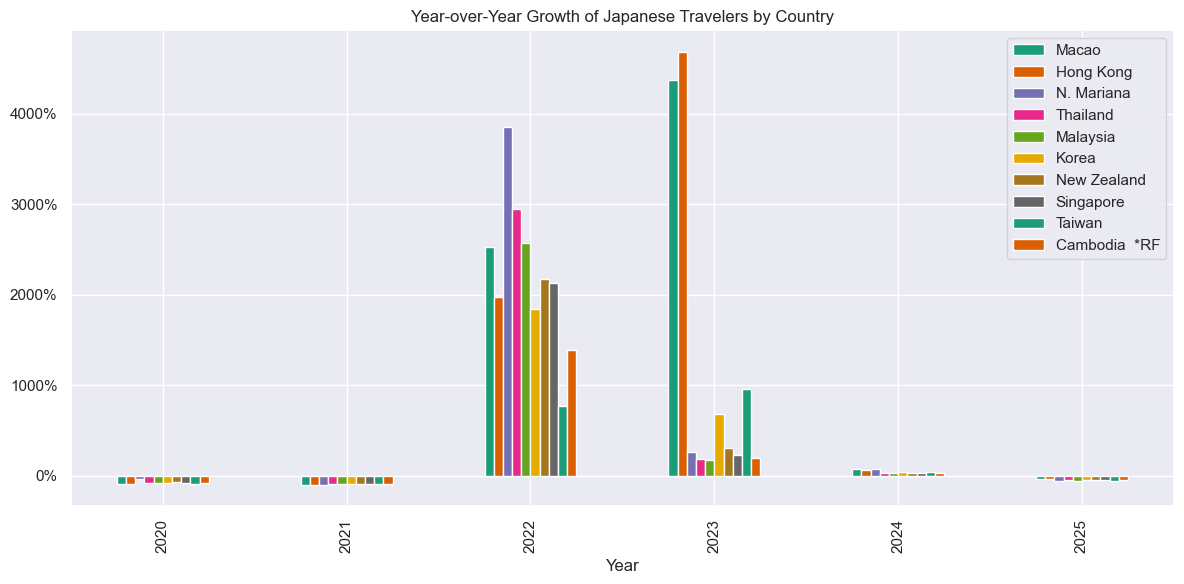

In [52]:
#data prep
numeric_cols = outbound_data.select_dtypes(include='number').columns.tolist()
outbound_data_year_grouped = outbound_data.groupby('Year')[numeric_cols].sum().sort_index()
outbound_data_year_grouped['Total'] = outbound_data_year_grouped.sum(axis=1)
outbound_data_year_grouped = outbound_data_year_grouped.apply(pd.to_numeric, errors='coerce').fillna(0)
df_yoy = outbound_data_year_grouped.pct_change() * 100  # convert to percentage
df_yoy = df_yoy.replace([np.inf, -np.inf], 0).fillna(0)  # replace infinities and NaN with 0
df_yoy = df_yoy.round(2)
outbound_data_year_grouped.index = pd.to_numeric(outbound_data_year_grouped.index, errors='coerce')
df_filtered = df_yoy.loc[2020:2025]
top10_countries = df_filtered.mean().sort_values(ascending=False).head(10).index
df_top10 = df_filtered[top10_countries]

#create plot
ax = df_top10.plot(kind='bar', figsize=(12,6))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}%'))
plt.title("Year-over-Year Growth of Japanese Travelers by Country")
plt.tight_layout()
plt.show()